In [1]:
# Adapted from likkhian yeo. See:
#   https://medium.com/analytics-vidhya/effects-of-l1-and-l2-regularization-explained-5a916ecf4f06
#   https://github.com/nickyeolk/regularization_visualized/blob/master/Regularization%20visualized.ipynb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/bt/zjjg82kn263c8q1ydh1tkgcw0000gn/T/ipykernel_44112/2862325731.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Our data is sampled from straight line, y = 0.5 x
#   with x ranging from -1 to 1.
x = np.arange(-1, 1, 0.1)
y = 0.5 * x

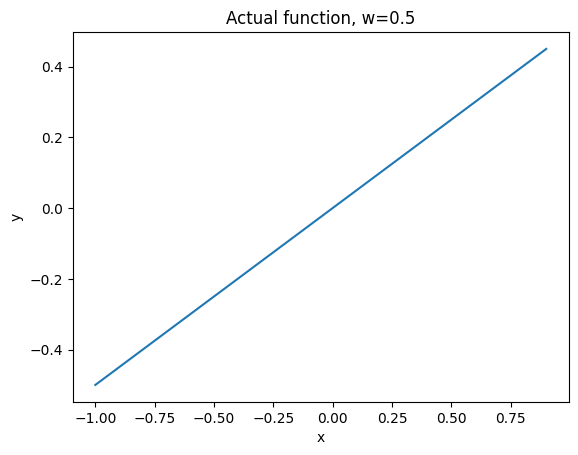

In [3]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual function, w=0.5')
plt.show()

In [4]:
# we have one parameter; the slope of our line
#   consider varying that parameter between -1 and 1
w = np.arange(-1, 1, 0.1)
errors = []

# for each weight, compute the mean-squared error
#     of a linear regression with that slope, 
#     compared to the true line 
for weight in w:
    error = (y - weight * x) ** 2
    errors.append(np.mean(error))

(0.0, 1.0)

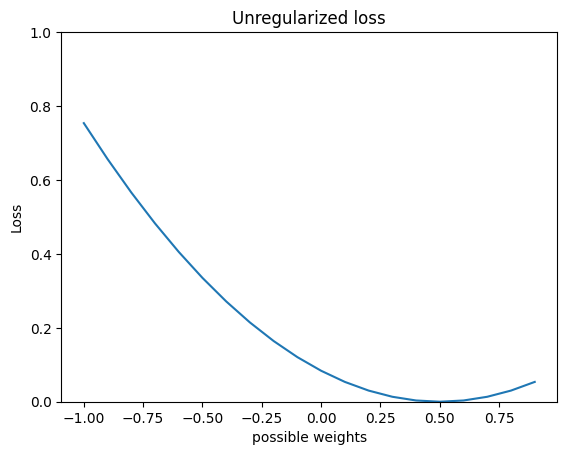

In [5]:
plt.plot(w,errors)
plt.title('Unregularized loss')
plt.xlabel('possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])

In [6]:
lmb=0.5 #lambda for loss
def l1reg(w, lmb):
    return lmb*np.absolute(w)
reg1 = l1reg(w, lmb) #l1 reg
def l2reg(w, lmb):
    return lmb*(w**2)
reg2 = l2reg(w, lmb) #L2 reg

df = pd.DataFrame({"w": w.round(2), "L1(w)": reg1.round(2), "L2(w)": reg2.round(2)})
print(df)

      w  L1(w)  L2(w)
0  -1.0   0.50   0.50
1  -0.9   0.45   0.40
2  -0.8   0.40   0.32
3  -0.7   0.35   0.25
4  -0.6   0.30   0.18
5  -0.5   0.25   0.13
6  -0.4   0.20   0.08
7  -0.3   0.15   0.05
8  -0.2   0.10   0.02
9  -0.1   0.05   0.01
10 -0.0   0.00   0.00
11  0.1   0.05   0.00
12  0.2   0.10   0.02
13  0.3   0.15   0.04
14  0.4   0.20   0.08
15  0.5   0.25   0.12
16  0.6   0.30   0.18
17  0.7   0.35   0.24
18  0.8   0.40   0.32
19  0.9   0.45   0.40


(0.0, 0.5)

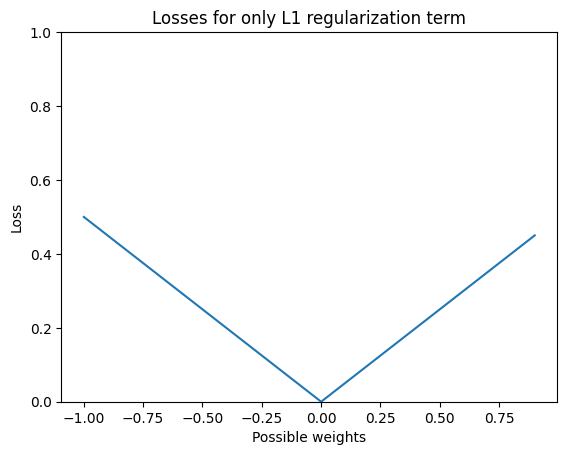

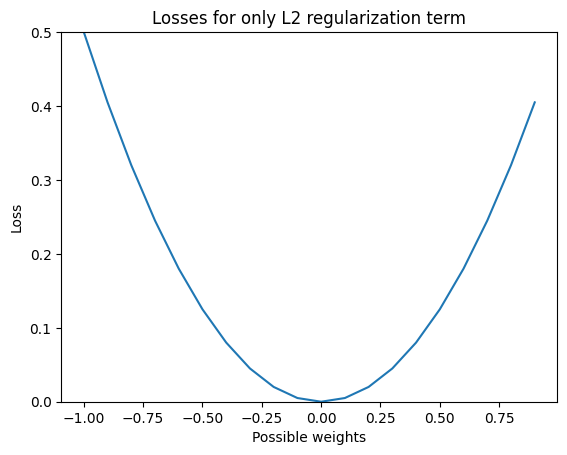

In [7]:
plt.figure(1)
plt.plot(w, reg1)
plt.title('Losses for only L1 regularization term')
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.figure(2)
plt.plot(w, reg2)
plt.title('Losses for only L2 regularization term')
plt.xlabel('Possible weights')
plt.ylabel('Loss')
plt.ylim([0,0.5])

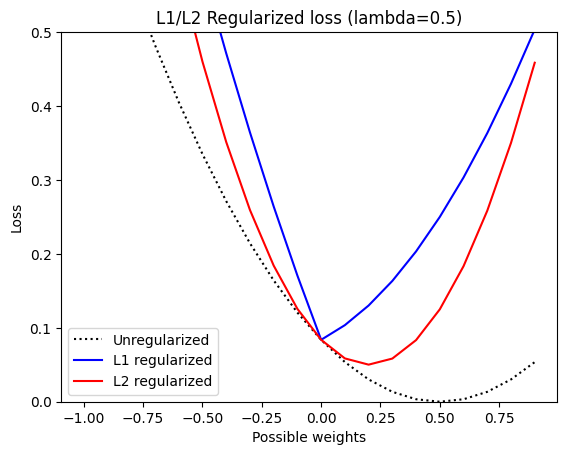

In [8]:
fig, axis = plt.subplots()
axis.plot(w, errors, ':k', label='Unregularized')
axis.plot(w, reg1+errors, 'b', label='L1 regularized')
axis.plot(w, reg2+errors, 'r', label='L2 regularized')
axis.set_title('L1/L2 Regularized loss (lambda=0.5)')
axis.set_xlabel('Possible weights')
axis.set_ylabel('Loss')
axis.set_ylim([0, 0.5])
_ = axis.legend()

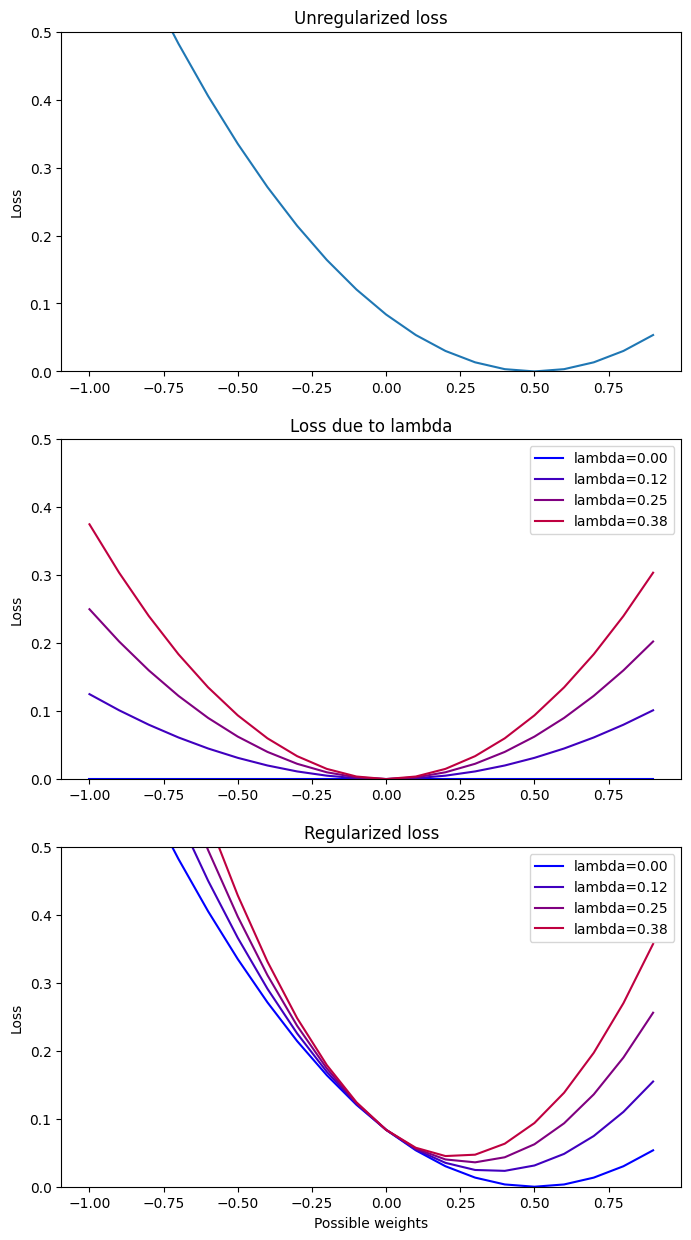

In [9]:
lmbdamax=0.5
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,15),
                         sharey=True)
axes[0].plot(w, errors)
for lmbda in np.arange(0, lmbdamax, lmbdamax / 4):
    reg = l2reg(w, lmbda)
    axes[1].plot(w, reg, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={:.2f}'.format(lmbda))
    axes[2].plot(w, reg+errors, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={:.2f}'.format(lmbda))

axes[0].set_ylabel('Loss')
axes[0].set_title('Unregularized loss')

axes[1].set_ylabel('Loss')
axes[1].set_title('Loss due to lambda')
axes[1].legend()


axes[2].set_xlabel('Possible weights')
axes[2].set_ylabel('Loss')
axes[2].set_title('Regularized loss')
axes[2].legend()
axes[2].set_ylim(0, 0.5)

plt.show()

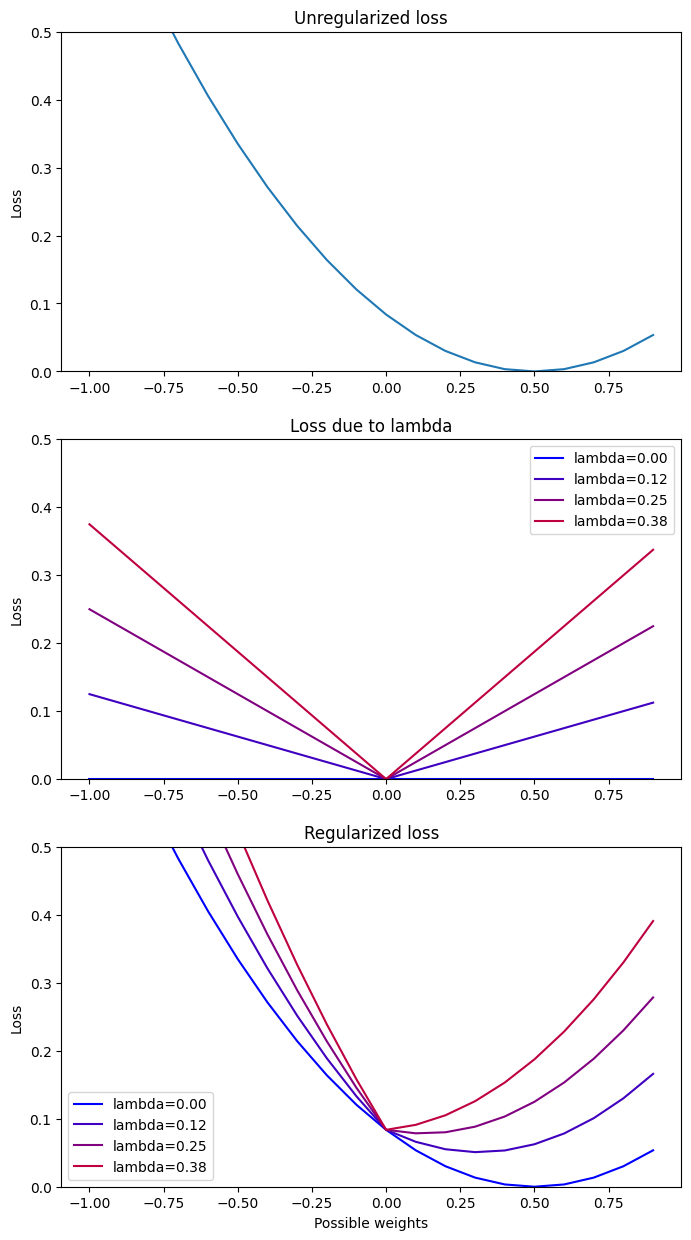

In [10]:
lmbdamax=0.5
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,15),
                         sharey=True)
axes[0].plot(w, errors)
for lmbda in np.arange(0, lmbdamax, lmbdamax / 4):
    reg = l1reg(w, lmbda)
    axes[1].plot(w, reg, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={:.2f}'.format(lmbda))
    axes[2].plot(w, reg+errors, color=(lmbda/lmbdamax, 0, 1-lmbda/lmbdamax), label='lambda={:.2f}'.format(lmbda))

axes[0].set_ylabel('Loss')
axes[0].set_title('Unregularized loss')

axes[1].set_ylabel('Loss')
axes[1].set_title('Loss due to lambda')
axes[1].legend()


axes[2].set_xlabel('Possible weights')
axes[2].set_ylabel('Loss')
axes[2].set_title('Regularized loss')
axes[2].legend()
axes[2].set_ylim(0, 0.5)

plt.show()